In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download piyushagni5/berlin-database-of-emotional-speech-emodb
! kaggle datasets download barelydedicated/savee-database
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess
! kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio
! kaggle datasets download ejlok1/cremad
! unzip berlin-database-of-emotional-speech-emodb.zip
! unzip savee-database.zip
! unzip toronto-emotional-speech-set-tess.zip
! unzip ravdess-emotional-speech-audio.zip
! unzip cremad.zip
! mkdir AllSpeechFiles
! pip3 install pydub
! rm ./AudioData/Info.txt
! pip3 install torchaudio
! mkdir AllImageFiles
#! pip install fastai 
#! pip install fastaudio
#! mkdir npydirec
#! pip install audio2numpy

 74% 28.0M/38.0M [00:00<00:00, 19.2MB/s]
100% 38.0M/38.0M [00:00<00:00, 43.6MB/s]
Archive:  berlin-database-of-emotional-speech-emodb.zip
  inflating: wav/03a01Fa.wav         
  inflating: wav/03a01Nc.wav         
  inflating: wav/03a01Wa.wav         
  inflating: wav/03a02Fc.wav         
  inflating: wav/03a02Nc.wav         
  inflating: wav/03a02Ta.wav         
  inflating: wav/03a02Wb.wav         
  inflating: wav/03a02Wc.wav         
  inflating: wav/03a04Ad.wav         
  inflating: wav/03a04Fd.wav         
  inflating: wav/03a04Lc.wav         
  inflating: wav/03a04Nc.wav         
  inflating: wav/03a04Ta.wav         
  inflating: wav/03a04Wc.wav         
  inflating: wav/03a05Aa.wav         
  inflating: wav/03a05Fc.wav         
  inflating: wav/03a05Nd.wav         
  inflating: wav/03a05Tc.wav         
  inflating: wav/03a05Wa.wav         
  inflating: wav/03a05Wb.wav         
  inflating: wav/03a07Fa.wav         
  inflating: wav/03a07Fb.wav         
  inflating: wav/03a07La.w

In [2]:
import glob
import pandas as pd
import os

for subdir, dirs, files in os.walk("AudioData"):
  for dir in dirs:
    directory = "AudioData/"+dir
    for count, filename in enumerate(os.listdir(directory)):
        dst = directory+'/'+dir+filename 
        src =directory+'/'+filename          
        os.rename(src, dst)

In [3]:
import glob
import pandas as pd
import os
import shutil

x = []
y = []
# emo-db
emotions = {
    "W": 'Angry',
    "L": 'Sad',
    "E": 'Disgust',
    "A": 'Fear',
    "F": 'Happy',
    "T": 'Sad',
    "N": 'Neutral'
}

for file in glob.glob("wav/*.wav"):
  file_name=os.path.basename(file)
  emotion=emotions[file_name[5]]
  x.append(file)
  y.append(emotion)
  #shutil.copy(file,'AllSpeechFiles/')

# ravdess
emotions={
  '01':'neutral',
  '03':'Happy',
  '04':'Sad',
  '05':'Angry',
  '06':'Fear',
  '07':'Disgust',
  '08':'Surprised'
}

for file in glob.glob("Actor_*/*.wav"):
  file_name=os.path.basename(file)
  if file_name.split("-")[2] == '02':
    continue
  emotion=emotions[file_name.split("-")[2]]
  x.append(file)
  y.append(emotion)
  #shutil.copy(file,'AllSpeechFiles/')

#savee
emotions={
  'n':'Neutral',
  'h':'Happy',
  'sa':'Sad',
  'a':'Angry',
  'f':'Fear',
  'd':'Disgust',
  'su':'Surprised'
}

l = ['n','h','a','f','d']
for file in glob.glob("AudioData/*/*.wav"):
  file_name=os.path.basename(file)
  if file_name[2] in l:
    emotion=emotions[file_name[2]]
  else:
    emotion = emotions[file_name[2]+file_name[3]]
  x.append(file)
  y.append(emotion)
  #shutil.copy(file,'AllSpeechFiles/')

# tess
emotions={
  'neutral':'Neutral',
  'happy':'Happy',
  'sad':'Sad',
  'angry':'Angry',
  'fear':'Fear',
  'disgust':'Disgust',
  'ps':'Surprised'
}

for file in glob.glob("TESS Toronto emotional speech set data/*/*.wav"):
  file_name=os.path.basename(file)
  emotion=emotions[file_name.split("_")[2][:-4]]
  x.append(file)
  y.append(emotion)

# ravdess
emotions={
  '01':'neutral',
  '03':'Happy',
  '04':'Sad',
  '05':'Angry',
  '06':'Fear',
  '07':'Disgust',
  '08':'Surprised'
}

for file in glob.glob("Actor_*/*.wav"):
  file_name=os.path.basename(file)
  if file_name.split("-")[2] == '02':
    continue
  emotion=emotions[file_name.split("-")[2]]
  x.append(file)
  y.append(emotion)
  #shutil.copy(file,'AllSpeechFiles/')

data_tuples = list(zip(x,y))
df = pd.DataFrame(data_tuples, columns=['file_name','emotion'])
classes = ['Happy','Angry','Neutral','Fear','Sad','Disgust','Surprised']
print(df)

           file_name  emotion
0    wav/03b10Nc.wav  Neutral
1    wav/13a05Ea.wav  Disgust
2    wav/15b02Tc.wav      Sad
3    wav/08b10Fd.wav    Happy
4    wav/03b01Wa.wav    Angry
..               ...      ...
530  wav/09b09Ea.wav  Disgust
531  wav/11b02Wb.wav    Angry
532  wav/08b10Nc.wav  Neutral
533  wav/13a02Ta.wav      Sad
534  wav/16b02Aa.wav     Fear

[535 rows x 2 columns]


In [4]:
import os
import shutil

os.makedirs("ImageData")
for i in classes:
  os.makedirs("ImageData/"+i)

for i in range(0,len(x)):
  shutil.copy(x[i], 'ImageData/' + y[i])

In [5]:
! rm ./ImageData/neutral

rm: cannot remove './ImageData/neutral': No such file or directory


In [6]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt

class AudioUtil():
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)

  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      
    return (sig, sr)

  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  @staticmethod
  def spectro_gram(aud, n_mels=128, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels,normalized = True)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

  @staticmethod
  def spectro_FreqMask(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    return aug_spec

  @staticmethod
  def spectro_TimeMask(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)
    return aug_spec

  @staticmethod
  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)
    return aug_spec

In [7]:
import os
import numpy as np
import shutil
import librosa.display
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import librosa

image_path = []
emotion = []
mel_spectogram_db = []
def plot_spectrogram(spec, file_name,prestr,rootdir,title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  name = file_name.split('/')[-1]
  fig, axs = plt.subplots(1, 1)
  im = axs.imshow(spec)
  name = name[:-4]
  plt.savefig(rootdir+"/"+name+prestr+".jpg")
  plt.close(fig)

def preprocessingTest(name,sr=16000,channel=2,duration=5000,shift_pct=0.4):
    audio_file = name
    aud = AudioUtil.open(audio_file)
    reaud = AudioUtil.resample(aud, sr)
    rechan = AudioUtil.rechannel(reaud, channel)

    dur_aud = AudioUtil.pad_trunc(rechan, duration)
    sgram = AudioUtil.spectro_gram(dur_aud, n_mels=64, n_fft=1024, hop_len=None)
    return sgram

def preprocessing(name,sr=16000,channel=2,duration=5000,shift_pct=0.4):
    audio_file = name
    aud = AudioUtil.open(audio_file)
    reaud = AudioUtil.resample(aud, sr)
    rechan = AudioUtil.rechannel(reaud, channel)

    dur_aud = AudioUtil.pad_trunc(rechan, duration)
    shift_aud = AudioUtil.time_shift(dur_aud, shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    return sgram

os.makedirs("Data")
os.makedirs("Data/train")
os.makedirs("Data/test")
os.makedirs("Data/valid")
rootdir = "Data"
for i in classes:
  os.makedirs(rootdir +'/train/' + str(i))

  os.makedirs(rootdir +'/test/' + str(i))

  os.makedirs(rootdir +'/valid/' + str(i))

  source = 'ImageData/' + str(i)

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.9

  train_FileNames, rem_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])
  
  test_FileNames,valid_FileNames = np.split(np.array(rem_FileNames),
                                                        [int(len(rem_FileNames)* (0.5))])
  

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]
  valid_FileNames = [source+'/' + name for name in valid_FileNames.tolist()]
  specgram = []
  for name in train_FileNames:
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = preprocessingTest(name)
    specgram.append(aug_sgram)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],name,'',dirtosave)
    name = name.split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave +'/'+name+'.jpg')
    emotion.append(i)

  for name in train_FileNames:
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = preprocessing(name)
    specgram.append(aug_sgram)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],name,'_shift_pre',dirtosave)
    name = name.split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave +'/'+name+"_shift_pre.jpg")
    emotion.append(i)

  for j in range(2*len(train_FileNames)):
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = AudioUtil.spectro_FreqMask(specgram[j], max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],train_FileNames[j%len(train_FileNames)],'_mask_freq_pre',dirtosave)
    name = train_FileNames[j%len(train_FileNames)].split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave+'/'+name+"_mask_freq_pre.jpg") 
    emotion.append(i) 

  for j in range(2*len(train_FileNames)):
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = AudioUtil.spectro_augment(specgram[j], max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],train_FileNames[j%len(train_FileNames)],'_mask_both_pre',dirtosave)
    name = train_FileNames[j%len(train_FileNames)].split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave+'/'+name+"_mask_both_pre.jpg") 
    emotion.append(i) 

  for j in range(2*len(train_FileNames)):
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = AudioUtil.spectro_TimeMask(specgram[j], max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],train_FileNames[j%len(train_FileNames)],'_mask_time_pre',dirtosave)
    name = train_FileNames[j%len(train_FileNames)].split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave+'/'+name+"_mask_time_pre.jpg") 
    emotion.append(i) 
  
  specgram = []
  # resample again 
  for name in train_FileNames:
    dirtosave = rootdir + '/train/' + str(i)
    sr = 19200
    aug_sgram = preprocessingTest(name,sr)
    specgram.append(aug_sgram)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],name,'_re',dirtosave)
    name = name.split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave +'/'+name+'_re.jpg')
    emotion.append(i)

  for name in train_FileNames:
    dirtosave = rootdir + '/train/' + str(i)
    sr = 19200
    aug_sgram = preprocessing(name,sr)
    specgram.append(aug_sgram)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],name,'_re_shift_pre',dirtosave)
    name = name.split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave +'/'+name+"_re_shift_pre.jpg")
    emotion.append(i)

  for j in range(2*len(train_FileNames)):
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = AudioUtil.spectro_FreqMask(specgram[j], max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],train_FileNames[j%len(train_FileNames)],'_re_mask_freq_pre',dirtosave)
    name = train_FileNames[j%len(train_FileNames)].split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave+'/'+name+"_re_mask_freq_pre.jpg") 
    emotion.append(i) 

  for j in range(2*len(train_FileNames)):
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = AudioUtil.spectro_augment(specgram[j], max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],train_FileNames[j%len(train_FileNames)],'_re_mask_both_pre',dirtosave)
    name = train_FileNames[j%len(train_FileNames)].split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave+'/'+name+"_re_mask_both_pre.jpg") 
    emotion.append(i) 

  for j in range(2*len(train_FileNames)):
    dirtosave = rootdir + '/train/' + str(i)
    aug_sgram = AudioUtil.spectro_TimeMask(specgram[j], max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
    mel_spectogram_db.append(aug_sgram)
    plot_spectrogram(aug_sgram[0],train_FileNames[j%len(train_FileNames)],'_re_mask_time_pre',dirtosave)
    name = train_FileNames[j%len(train_FileNames)].split('/')[-1]
    name = name[:-4]
    image_path.append(dirtosave+'/'+name+"_re_mask_time_pre.jpg") 
    emotion.append(i) 

  for name in test_FileNames:
    dirtosave = rootdir + '/test/' + str(i)
    aug_sgram = preprocessingTest(name)
    plot_spectrogram(aug_sgram[0],name,'',dirtosave)

  for name in valid_FileNames:
    dirtosave = rootdir + '/valid/' + str(i)
    aug_sgram = preprocessingTest(name)
    plot_spectrogram(aug_sgram[0],name,'',dirtosave)

In [8]:
import torch as tf

data_tuples = list(zip(image_path,emotion,mel_spectogram_db))
df = pd.DataFrame(data_tuples, columns=['path','class','mel_spectogram_db'])
df["mel_spectogram_db_mean"] = df["mel_spectogram_db"].apply(tf.mean, axis=0)
print(df)

                                                path  ...                             mel_spectogram_db_mean
0                       Data/train/Happy/12a01Fb.jpg  ...  [[tensor(-71.3826), tensor(-71.3826), tensor(-...
1                       Data/train/Happy/09a01Fa.jpg  ...  [[tensor(-67.5955), tensor(-67.5955), tensor(-...
2                       Data/train/Happy/08b10Fd.jpg  ...  [[tensor(-63.1160), tensor(-63.1160), tensor(-...
3                       Data/train/Happy/11b09Fd.jpg  ...  [[tensor(-67.2107), tensor(-67.2107), tensor(-...
4                       Data/train/Happy/16b09Fb.jpg  ...  [[tensor(-67.0286), tensor(-67.0286), tensor(-...
..                                               ...  ...                                                ...
795  Data/train/Disgust/11a02Ec_re_mask_time_pre.jpg  ...  [[tensor(-63.1275), tensor(-63.1275), tensor(-...
796  Data/train/Disgust/13b09Ec_re_mask_time_pre.jpg  ...  [[tensor(-62.5865), tensor(-62.5865), tensor(-...
797  Data/train/Dis

In [9]:
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image
# Useful for examining network
from torchsummary import summary
# Timing utility
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

# Printing out all outputs
InteractiveShell.ast_node_interactivity = 'all'

In [10]:
# Location of data
datadir = 'Data/'
traindir = datadir + 'train/'
validdir = datadir + 'valid/'
testdir = datadir + 'test/'

save_file_name = 'vgg16-transfer-4.pt'
checkpoint_path = 'vgg16-transfer-4.pth'

# Change to fit hardware
batch_size = 16

# Whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False

Train on gpu: True
1 gpus detected.


In [11]:
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

# Iterate through each category
for d in os.listdir(traindir):
    categories.append(d)

    # Number of each image
    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    # Find stats for train images
    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       'n_valid': n_valid, 'n_test': n_test}).\
    sort_values('category')

# Dataframe of training images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()
cat_df.tail()

,category,n_train,n_valid,n_test
3,Sad,140,65,64
5,Angry,120,58,57
4,Happy,70,32,32
2,Neutral,70,36,36
0,Fear,60,32,31


,category,n_train,n_valid,n_test
5,Angry,120,58,57
4,Happy,70,32,32
2,Neutral,70,36,36
0,Fear,60,32,31
1,Disgust,40,21,21


In [12]:
print(cat_df)

  category  n_train  n_valid  n_test
3      Sad      140       65      64
5    Angry      120       58      57
4    Happy       70       32      32
2  Neutral       70       36      36
0     Fear       60       32      31
1  Disgust       40       21      21


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Training Images by Category')

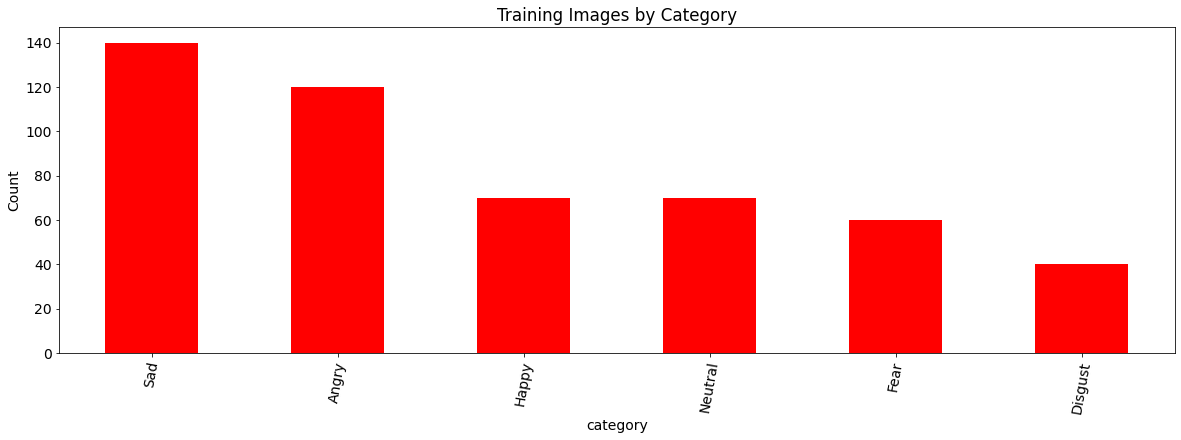

In [13]:
cat_df.set_index('category')['n_train'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')

In [14]:
img_dsc = image_df.groupby('category').describe()
img_dsc.head()

height                            ...  width                            
          count   mean  std    min    25%  ...    min    25%    50%    75%    max
category                                   ...                                   
Angry     120.0  288.0  0.0  288.0  288.0  ...  432.0  432.0  432.0  432.0  432.0
Disgust    40.0  288.0  0.0  288.0  288.0  ...  432.0  432.0  432.0  432.0  432.0
Fear       60.0  288.0  0.0  288.0  288.0  ...  432.0  432.0  432.0  432.0  432.0
Happy      70.0  288.0  0.0  288.0  288.0  ...  432.0  432.0  432.0  432.0  432.0
Neutral    70.0  288.0  0.0  288.0  288.0  ...  432.0  432.0  432.0  432.0  432.0

[5 rows x 16 columns]

In [16]:
# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    # Validation does not use augmentation
    'val':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



In [17]:
#import shutil
# String path of folder to be removed:
#path = 'Data/valid/Disgust'
# Remove the folder recursively:
#shutil.rmtree(path)

In [18]:
# Datasets from each folder
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'val':
    datasets.ImageFolder(root=validdir, transform=image_transforms['val']),
    'test':
    datasets.ImageFolder(root=testdir, transform=image_transforms['test'])
}

# Dataloader iterators
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'val': DataLoader(data['val'], batch_size=batch_size, shuffle=True),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True)
}

In [19]:
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

In [20]:
n_classes = len(cat_df)
print(f'There are {n_classes} different classes.')

len(data['train'].classes)

There are 6 different classes.


6

In [21]:
model = models.vgg16(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [22]:
for param in model.parameters():
    param.requires_grad = False

In [23]:
n_inputs = model.classifier[6].in_features

# Add on classifier
model.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.4),
    nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=6, bias=True)
    (4): LogSoftmax(dim=1)
  )
)

In [24]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')



135,310,918 total parameters.
1,050,374 training parameters.


In [25]:
if train_on_gpu:
    model = model.to('cuda')

if multi_gpu:
    model = nn.DataParallel(model)

In [26]:
def get_pretrained_model(model_name):
    """Retrieve a pre-trained model from torchvision

    Params
    -------
        model_name (str): name of the model (currently only accepts vgg16 and resnet50)

    Return
    --------
        model (PyTorch model): cnn

    """

    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True)

        # Freeze early layers
        for param in model.parameters():
            param.requires_grad = False
        n_inputs = model.classifier[6].in_features

        # Add on classifier
        model.classifier[6] = nn.Sequential(
            nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True)

        for param in model.parameters():
            param.requires_grad = False

        n_inputs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

    # Move to gpu and parallelize
    if train_on_gpu:
        model = model.to('cuda')

    if multi_gpu:
        model = nn.DataParallel(model)

    return model

In [27]:
model = get_pretrained_model('vgg16')
if multi_gpu:
    summary(
        model.module,
        input_size=(3, 224, 224),
        batch_size=batch_size,
        device='cuda')
else:
    summary(
        model, input_size=(3, 224, 224), batch_size=batch_size, device='cuda')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [16, 64, 224, 224]           1,792
              ReLU-2         [16, 64, 224, 224]               0
            Conv2d-3         [16, 64, 224, 224]          36,928
              ReLU-4         [16, 64, 224, 224]               0
         MaxPool2d-5         [16, 64, 112, 112]               0
            Conv2d-6        [16, 128, 112, 112]          73,856
              ReLU-7        [16, 128, 112, 112]               0
            Conv2d-8        [16, 128, 112, 112]         147,584
              ReLU-9        [16, 128, 112, 112]               0
        MaxPool2d-10          [16, 128, 56, 56]               0
           Conv2d-11          [16, 256, 56, 56]         295,168
             ReLU-12          [16, 256, 56, 56]               0
           Conv2d-13          [16, 256, 56, 56]         590,080
             ReLU-14          [16, 256,

In [28]:
if multi_gpu:
    print(model.module.classifier[6])
else:
    print(model.classifier[6])

Sequential(
  (0): Linear(in_features=4096, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=256, out_features=6, bias=True)
  (4): LogSoftmax(dim=1)
)


In [29]:
model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10]

[(0, 'Angry'),
 (1, 'Disgust'),
 (2, 'Fear'),
 (3, 'Happy'),
 (4, 'Neutral'),
 (5, 'Sad')]

In [30]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [31]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([256, 4096])
torch.Size([256])
torch.Size([6, 256])
torch.Size([6])


In [32]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=200,
          print_every=2):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [34]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=5,
    n_epochs=200,
    print_every=2)

Model has been trained for: 1 epochs.


Epoch: 1 	Training Loss: 1.5005 	Validation Loss: 1.3939
		Training Accuracy: 40.80%	 Validation Accuracy: 48.36%

Epoch: 3 	Training Loss: 1.4377 	Validation Loss: 1.3730
		Training Accuracy: 44.60%	 Validation Accuracy: 46.31%

Epoch: 5 	Training Loss: 1.3958 	Validation Loss: 1.3899
		Training Accuracy: 47.20%	 Validation Accuracy: 46.31%

Epoch: 7 	Training Loss: 1.3312 	Validation Loss: 1.3305
		Training Accuracy: 49.80%	 Validation Accuracy: 50.82%

Epoch: 9 	Training Loss: 1.3746 	Validation Loss: 1.3332
		Training Accuracy: 45.20%	 Validation Accuracy: 48.77%

Epoch: 11 	Training Loss: 1.3223 	Validation Loss: 1.2746
		Training Accuracy: 50.40%	 Validation Accuracy: 49.59%

Epoch: 13 	Training Loss: 1.2774 	Validation Loss: 1.2995
		Training Accuracy: 50.20%	 Validation Accuracy: 47.13%

Epoch: 15 	Training Loss: 1.3131 	Validation Loss: 1.2830
		Training Accuracy: 47.80%	 Validation Accuracy: 48.36%

Early Stopping! Total epochs: 16. Bes

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Average Negative Log Likelihood')

Text(0.5, 1.0, 'Training and Validation Losses')

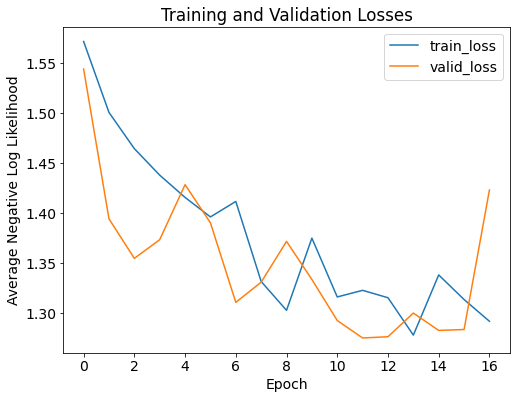

In [35]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Average Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

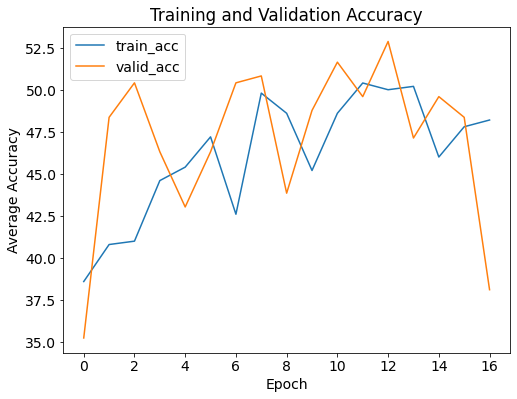

In [36]:
plt.figure(figsize=(8, 6))
for c in ['train_acc', 'valid_acc']:
    plt.plot(
        100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

In [37]:
def save_checkpoint(model, path):
    """Save a PyTorch model checkpoint

    Params
    --------
        model (PyTorch model): model to save
        path (str): location to save model. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Basic details
    checkpoint = {
        'class_to_idx': model.class_to_idx,
        'idx_to_class': model.idx_to_class,
        'epochs': model.epochs,
    }

    # Extract the final classifier and the state dictionary
    if model_name == 'vgg16':
        # Check to see if model was parallelized
        if multi_gpu:
            checkpoint['classifier'] = model.module.classifier
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['classifier'] = model.classifier
            checkpoint['state_dict'] = model.state_dict()

    elif model_name == 'resnet50':
        if multi_gpu:
            checkpoint['fc'] = model.module.fc
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['fc'] = model.fc
            checkpoint['state_dict'] = model.state_dict()

    # Add the optimizer
    checkpoint['optimizer'] = model.optimizer
    checkpoint['optimizer_state_dict'] = model.optimizer.state_dict()

    # Save the data to the path
    torch.save(checkpoint, path)

In [38]:
save_checkpoint(model, path=checkpoint_path)

In [39]:
def load_checkpoint(path):
    """Load a PyTorch model checkpoint

    Params
    --------
        path (str): saved model checkpoint. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    # Get the model name
    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Load in checkpoint
    checkpoint = torch.load(path)

    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = checkpoint['classifier']

    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.fc = checkpoint['fc']

    # Load in the state dict
    model.load_state_dict(checkpoint['state_dict'])

    total_params = sum(p.numel() for p in model.parameters())
    print(f'{total_params:,} total parameters.')
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f'{total_trainable_params:,} total gradient parameters.')

    # Move to gpu
    if multi_gpu:
        model = nn.DataParallel(model)

    if train_on_gpu:
        model = model.to('cuda')

    # Model basics
    model.class_to_idx = checkpoint['class_to_idx']
    model.idx_to_class = checkpoint['idx_to_class']
    model.epochs = checkpoint['epochs']

    # Optimizer
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return model, optimizer

In [40]:
model, optimizer = load_checkpoint(path=checkpoint_path)

if multi_gpu:
    summary(model.module, input_size=(3, 224, 224), batch_size=batch_size)
else:
    summary(model, input_size=(3, 224, 224), batch_size=batch_size)

135,310,918 total parameters.
1,050,374 total gradient parameters.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [16, 64, 224, 224]           1,792
              ReLU-2         [16, 64, 224, 224]               0
            Conv2d-3         [16, 64, 224, 224]          36,928
              ReLU-4         [16, 64, 224, 224]               0
         MaxPool2d-5         [16, 64, 112, 112]               0
            Conv2d-6        [16, 128, 112, 112]          73,856
              ReLU-7        [16, 128, 112, 112]               0
            Conv2d-8        [16, 128, 112, 112]         147,584
              ReLU-9        [16, 128, 112, 112]               0
        MaxPool2d-10          [16, 128, 56, 56]               0
           Conv2d-11          [16, 256, 56, 56]         295,168
             ReLU-12          [16, 256, 56, 56]               0
           Conv2d-13          [16, 2

In [41]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=5,
    n_epochs=200,
    print_every=1)

Model has been trained for: 18 epochs.


Epoch: 0 	Training Loss: 1.3180 	Validation Loss: 1.2750
		Training Accuracy: 48.20%	 Validation Accuracy: 48.36%

Epoch: 1 	Training Loss: 1.2871 	Validation Loss: 1.3080
		Training Accuracy: 49.00%	 Validation Accuracy: 45.49%

Best epoch: 0 with loss: 1.27 and acc: 45.49%
24.85 total seconds elapsed. 24.85 seconds per epoch.


In [42]:
def process_image(image_path):
    """Process an image path into a PyTorch tensor"""

    image = Image.open(image_path)
    # Resize
    img = image.resize((256, 256))

    # Center crop
    width = 256
    height = 256
    new_width = 224
    new_height = 224

    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    img = img.crop((left, top, right, bottom))

    # Convert to numpy, transpose color dimension and normalize
    img = np.array(img).transpose((2, 0, 1)) / 256

    # Standardization
    means = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    stds = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
    #channel1 = img[:, :, 0] - means
    #channel2 = img[:, :, 1] - means
    #channel3 = img[:, :, 2] - means
    #channel1 = channel1/stds
    #channel2 = channel2/stds
    #channel3 = channel3/stds
    #img = np.dstack((channel1, channel2, channel3))
    img = img - means
    img = img / stds

    img_tensor = torch.Tensor(img)

    return img_tensor

In [43]:
def predict(image_path, model, topk=5):
    """Make a prediction for an image using a trained model

    Params
    --------
        image_path (str): filename of the image
        model (PyTorch model): trained model for inference
        topk (int): number of top predictions to return

    Returns

    """
    real_class = image_path.split('/')[-2]

    # Convert to pytorch tensor
    img_tensor = process_image(image_path)

    # Resize
    if train_on_gpu:
        img_tensor = img_tensor.view(1, 3, 224, 224).cuda()
    else:
        img_tensor = img_tensor.view(1, 3, 224, 224)

    # Set to evaluation
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(img_tensor)
        ps = torch.exp(out)

        # Find the topk predictions
        topk, topclass = ps.topk(topk, dim=1)

        # Extract the actual classes and probabilities
        top_classes = [
            model.idx_to_class[class_] for class_ in topclass.cpu().numpy()[0]
        ]
        top_p = topk.cpu().numpy()[0]

        return img_tensor.cpu().squeeze(), top_p, top_classes, real_class

In [44]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image



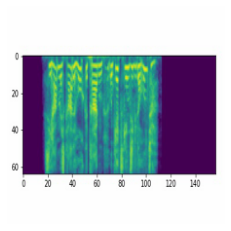

In [45]:
np.random.seed = 100


def random_test_image():
    """Pick a random test image from the test directory"""
    c = np.random.choice(cat_df['category'])
    root = testdir + c + '/'
    img_path = root + np.random.choice(os.listdir(root))
    return img_path

image = process_image(random_test_image())
image = image[..., :3]
_ = imshow_tensor(process_image(random_test_image()))

In [46]:
img, top_p, top_classes, real_class = predict(random_test_image(), model)
img.shape

torch.Size([3, 224, 224])

In [47]:
top_p, top_classes, real_class

(array([0.32798913, 0.26094392, 0.19598871, 0.13162574, 0.05250487],
       dtype=float32),
 ['Sad', 'Neutral', 'Disgust', 'Fear', 'Angry'],
 'Disgust')

In [48]:
img, top_p, top_classes, real_class = predict(random_test_image(), model)
top_p, top_classes, real_class

(array([0.45396182, 0.18929358, 0.17495123, 0.09384187, 0.04646677],
       dtype=float32),
 ['Fear', 'Angry', 'Happy', 'Neutral', 'Disgust'],
 'Fear')

In [49]:
def display_prediction(image_path, model, topk):
    """Display image and preditions from model"""

    # Get predictions
    img, ps, classes, y_obs = predict(image_path, model, topk)
    # Convert results to dataframe for plotting
    result = pd.DataFrame({'p': ps}, index=classes)

    # Show the image
    plt.figure(figsize=(16, 5))
    ax = plt.subplot(1, 2, 1)
    ax, img = imshow_tensor(img, ax=ax)

    # Set title to be the actual class
    ax.set_title(y_obs, size=20)

    ax = plt.subplot(1, 2, 2)
    # Plot a bar plot of predictions
    result.sort_values('p')['p'].plot.barh(color='blue', edgecolor='k', ax=ax)
    plt.xlabel('Predicted Probability')
    plt.tight_layout()

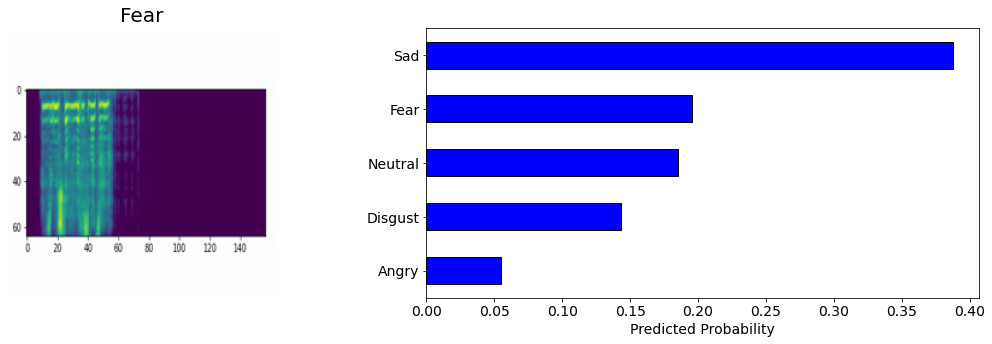

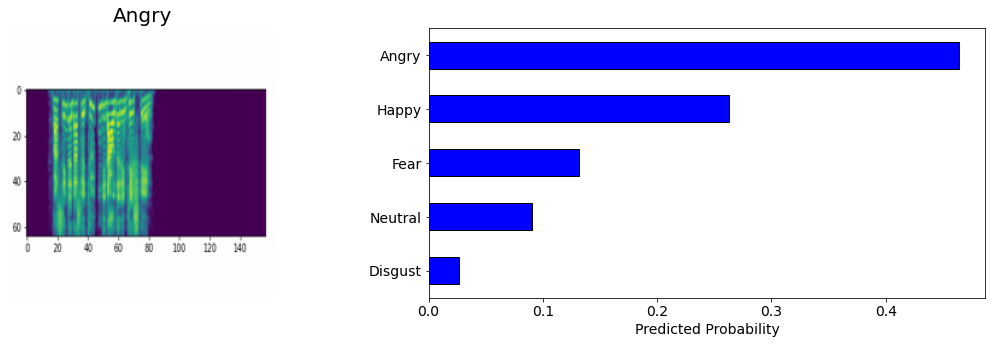

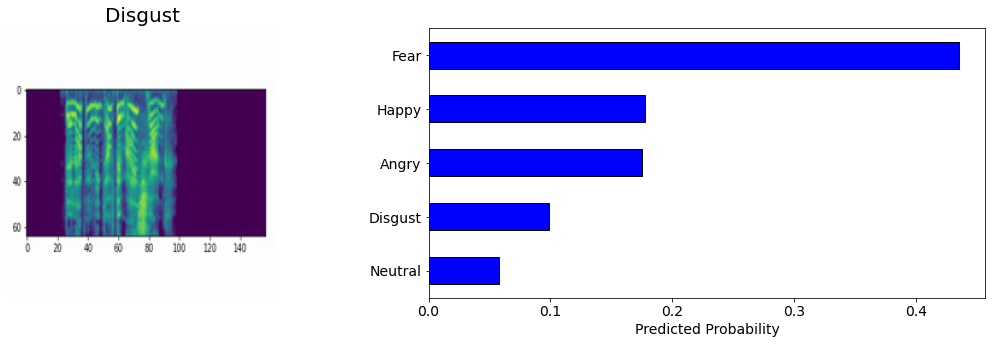

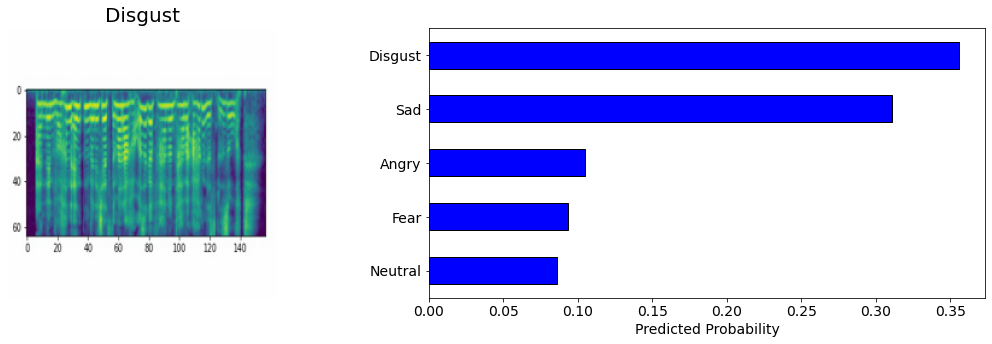

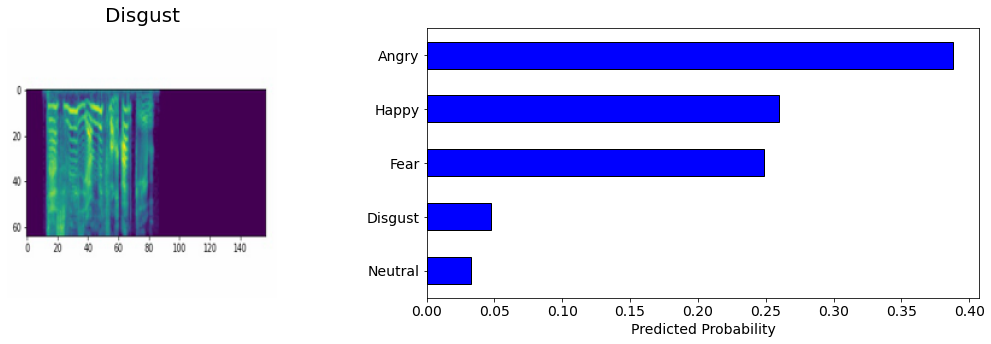

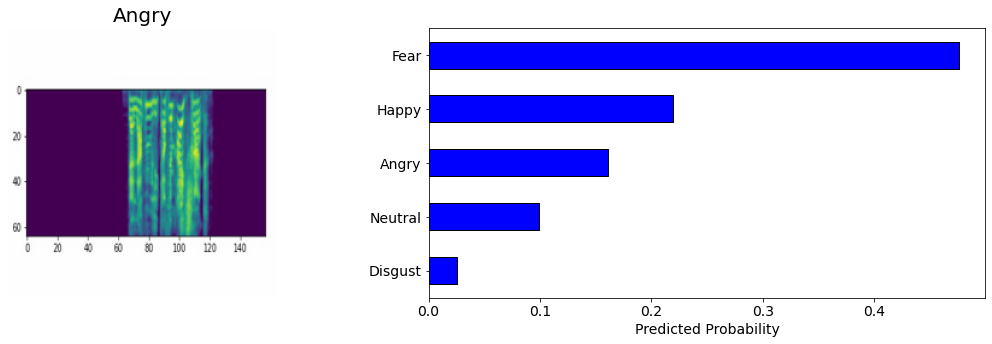

In [67]:
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)
display_prediction(random_test_image(), model, topk=5)

In [51]:
def accuracy(output, target, topk=(1, )):
    """Compute the topk accuracy(s)"""
    if train_on_gpu:
        output = output.to('cuda')
        target = target.to('cuda')

    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        # Find the predicted classes and transpose
        _, pred = output.topk(k=maxk, dim=1, largest=True, sorted=True)
        pred = pred.t()

        # Determine predictions equal to the targets
        correct = pred.eq(target.reshape(1, -1).expand_as(pred))

        res = []

        # For each k, find the percentage of correct
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size).item())
        return res

In [52]:
testiter = iter(dataloaders['test'])
# Get a batch of testing images and labels
features, targets = next(testiter)
if train_on_gpu:
    accuracy(model(features.to('cuda')), targets, topk=(1, 5))
else:
    accuracy(model(features), targets, topk=(1, 5))

[37.5, 100.0]

In [53]:
def evaluate(model, test_loader, criterion, topk=(1, 5)):
    """Measure the performance of a trained PyTorch model

    Params
    --------
        model (PyTorch model): trained cnn for inference
        test_loader (PyTorch DataLoader): test dataloader
        topk (tuple of ints): accuracy to measure

    Returns
    --------
        results (DataFrame): results for each category

    """

    classes = []
    losses = []
    # Hold accuracy results
    acc_results = np.zeros((len(test_loader.dataset), len(topk)))
    i = 0

    model.eval()
    with torch.no_grad():

        # Testing loop
        for data, targets in test_loader:

            # Tensors to gpu
            if train_on_gpu:
                data, targets = data.to('cuda'), targets.to('cuda')

            # Raw model output
            out = model(data)
            # Iterate through each example 
            for pred, true in zip(out, targets):
                # Find topk accuracy
                acc_results[i, :] = accuracy(
                    pred.unsqueeze(0), true.unsqueeze(0), topk)
                classes.append(model.idx_to_class[true.item()])
                # Calculate the loss
                loss = criterion(pred.view(1, n_classes), true.view(1))
                losses.append(loss.item())
                i += 1

    # Send results to a dataframe and calculate average across classes
    results = pd.DataFrame(acc_results, columns=[f'top{i}' for i in topk])
    results['class'] = classes
    results['loss'] = losses
    results = results.groupby(classes).mean()

    return results.reset_index().rename(columns={'index': 'class'})

In [54]:
criterion = nn.NLLLoss()
# Evaluate the model on all the training data
results = evaluate(model, dataloaders['test'], criterion)
results.head()

,class,top1,top5,loss
0,Angry,61.403509,96.491228,1.304907
1,Disgust,14.285714,100.000000,1.712371
2,Fear,61.290323,100.000000,1.321658
3,Happy,6.250000,68.750000,2.029899
4,Neutral,30.555556,100.000000,1.481684


Text(0.5, 29.26062499999999, 'images')

Text(21.869999999999997, 0.5, 'Accuracy (%)')

Text(0.5, 1.0, 'Top 1 Accuracy vs Number of Training Images')

(-5.0, 105.0)

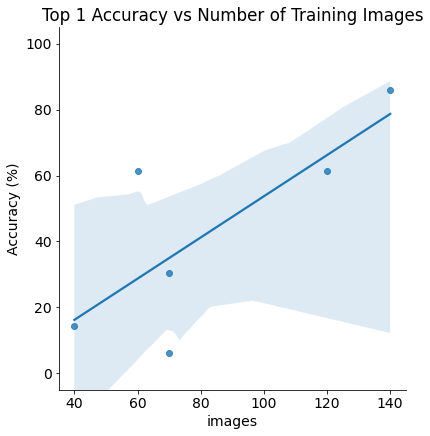

In [55]:
results = results.merge(cat_df, left_on='class', right_on='category').\
    drop(columns=['category'])

# Plot using seaborn
sns.lmplot(
    y='top1', x='n_train', data=results, height=6)
plt.xlabel('images')
plt.ylabel('Accuracy (%)')
plt.title('Top 1 Accuracy vs Number of Training Images')
plt.ylim(-5, 105)

In [56]:
print('Category with minimum accuracy.')
results.loc[results['top1'].idxmin]

print('Category with minimum images.')
results.loc[results['n_train'].idxmin]



Category with minimum accuracy.


class       Happy
top1         6.25
top5        68.75
loss       2.0299
n_train        70
n_valid        32
n_test         32
Name: 3, dtype: object

Category with minimum images.


class      Disgust
top1       14.2857
top5           100
loss       1.71237
n_train         40
n_valid         21
n_test          21
Name: 1, dtype: object

Text(0.5, 29.26062499999999, 'images')

Text(24.869999999999997, 0.5, 'Accuracy (%)')

Text(0.5, 1.0, 'Top 5 Accuracy vs Number of Training Images')

(-5.0, 105.0)

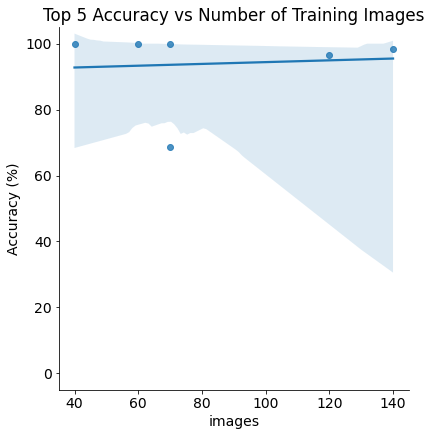

In [57]:
sns.lmplot(
    y='top5', x='n_train', data=results, height=6)
plt.xlabel('images')
plt.ylabel('Accuracy (%)')
plt.title('Top 5 Accuracy vs Number of Training Images')
plt.ylim(-5, 105)

In [58]:
# Weighted column of test images
results['weighted'] = results['n_test'] / results['n_test'].sum()

# Create weighted accuracies
for i in (1, 5):
    results[f'weighted_top{i}'] = results['weighted'] * results[f'top{i}']

# Find final accuracy accounting for frequencies
top1_weighted = results['weighted_top1'].sum()
top5_weighted = results['weighted_top5'].sum()
loss_weighted = (results['weighted'] * results['loss']).sum()

print(f'Final test cross entropy per image = {loss_weighted:.4f}.')
print(f'Final test top 1 weighted accuracy = {top1_weighted:.2f}%')

Final test cross entropy per image = 1.2921.
Final test top 1 weighted accuracy = 51.87%


In [66]:
#from sklearn import metrics

#print(true.cpu().numpy())
#print(metrics.confusion_matrix(true, predicted, labels=["Angry", "Disgust", "Happy", "Neutral", "Sad"]))
# Printing the precision and recall, among other metrics
#print(metrics.classification_report(true, predicted, labels=["Angry", "Disgust", "Happy", "Neutral", "Sad"]))

[5]


TypeError: ignored

In [69]:
nb_classes = 7

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['test']):
        inputs = inputs.to('cuda')
        classes = classes.to('cuda')
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[35.,  0., 12.,  0.,  0., 10.],
        [ 0.,  3.,  3.,  0.,  1., 14.],
        [ 1.,  1., 19.,  0.,  0., 10.],
        [12.,  0.,  8.,  2.,  0., 10.],
        [ 0.,  0.,  4.,  0., 11., 21.],
        [ 1.,  1.,  7.,  0.,  0., 55.]])
